In [1]:
from pyspark.sql import SQLContext
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from notebooks import utils
%matplotlib inline

In [2]:
sqlContext = SQLContext(sc)
df = sqlContext.read.load('file:///home/cloudera/Downloads/coursera-master/big-data-4/minute_weather.csv', 
                          format='com.databricks.spark.csv', 
                          header='true',inferSchema='true')

In [3]:
df.count()

1587257

In [7]:
df.toPandas()

rowID    hpwren_timestamp  air_pressure  air_temp  \
0              0 2011-09-10 00:00:49         912.3     64.76   
1              1 2011-09-10 00:01:49         912.3     63.86   
2              2 2011-09-10 00:02:49         912.3     64.22   
3              3 2011-09-10 00:03:49         912.3     64.40   
4              4 2011-09-10 00:04:49         912.3     64.40   
5              5 2011-09-10 00:05:49         912.3     63.50   
6              6 2011-09-10 00:06:49         912.3     62.78   
7              7 2011-09-10 00:07:49         912.3     62.42   
8              8 2011-09-10 00:08:49         912.3     62.24   
9              9 2011-09-10 00:09:49         912.3     62.24   
10            10 2011-09-10 00:10:49         912.3     62.24   
11            11 2011-09-10 00:11:49         912.2     63.14   
12            12 2011-09-10 00:12:49         912.2     64.04   
13            13 2011-09-10 00:13:49         912.2     64.40   
14            14 2011-09-10 00:14:49         912.2     64.94   
15            15 2011-09-10 00:15:49         912.2     65.48   
16            16 2011-09-10 00:16:49         912.3     65.48   
17            17 2011-09-10 00:17:49         912.3     64.94   
18            18 2011-09-10 00:18:49         912.3     64.04   
19            19 2011-09-10 00:19:49         912.2     63.32   
20            20 2011-09-10 00:20:49         912.2     63.32   
21            21 2011-09-10 00:21:49         912.2     63.32   
22            22 2011-09-10 00:22:49         912.2     63.32   
23            23 2011-09-10 00:23:49         912.2     63.32   
24            24 2011-09-10 00:24:49         912.2     63.50   
25            25 2011-09-10 00:25:49         912.2     63.86   
26            26 2011-09-10 00:26:49         912.2     63.68   
27            27 2011-09-10 00:27:49         912.2     63.50   
28            28 2011-09-10 00:28:49         912.2     63.14   
29            29 2011-09-10 00:29:49         912.2     62.78   
...          ...                 ...           ...       ...   
1587227  1587227 2014-09-10 23:30:29         915.9     75.56   
1587228  1587228 2014-09-10 23:31:29         915.9     75.56   
1587229  1587229 2014-09-10 23:32:29         915.9     75.56   
1587230  1587230 2014-09-10 23:33:29         915.9     75.56   
1587231  1587231 2014-09-10 23:34:29         915.9     75.56   
1587232  1587232 2014-09-10 23:35:29         915.9     75.56   
1587233  1587233 2014-09-10 23:36:29         915.9     75.38   
1587234  1587234 2014-09-10 23:37:29         915.9     75.38   
1587235  1587235 2014-09-10 23:38:29         915.9     75.38   
1587236  1587236 2014-09-10 23:39:29         915.9     75.38   
1587237  1587237 2014-09-10 23:40:29         915.9     75.38   
1587238  1587238 2014-09-10 23:41:29         915.9     75.20   
1587239  1587239 2014-09-10 23:42:29         915.9     75.20   
1587240  1587240 2014-09-10 23:43:29         915.9     75.20   
1587241  1587241 2014-09-10 23:44:29         915.9     75.20   
1587242  1587242 2014-09-10 23:45:29         915.9     75.20   
1587243  1587243 2014-09-10 23:46:29         915.9     75.20   
1587244  1587244 2014-09-10 23:47:29         915.9     75.02   
1587245  1587245 2014-09-10 23:48:29         915.9     75.02   
1587246  1587246 2014-09-10 23:49:29         915.9     75.02   
1587247  1587247 2014-09-10 23:50:29         915.9     74.84   
1587248  1587248 2014-09-10 23:51:29         915.9     74.84   
1587249  1587249 2014-09-10 23:52:29         915.9     74.84   
1587250  1587250 2014-09-10 23:53:29         915.9     74.84   
1587251  1587251 2014-09-10 23:54:29         915.9     74.66   
1587252  1587252 2014-09-10 23:55:29         915.9     74.66   
1587253  1587253 2014-09-10 23:56:29         915.9     74.66   
1587254  1587254 2014-09-10 23:57:29         915.9     74.66   
1587255  1587255 2014-09-10 23:58:29         915.9     74.66   
1587256  1587256 2014-09-10 23:59:29         915.9     74.66   

         avg_wind_direction  avg_wind_spee

In [5]:
filterDF = df.filter((df.rowID % 10)==0)
filterDF.toPandas()

rowID    hpwren_timestamp  air_pressure  air_temp  \
0             0 2011-09-10 00:00:49         912.3     64.76   
1            10 2011-09-10 00:10:49         912.3     62.24   
2            20 2011-09-10 00:20:49         912.2     63.32   
3            30 2011-09-10 00:30:49         912.2     62.60   
4            40 2011-09-10 00:40:49         912.2     64.04   
5            50 2011-09-10 00:50:49         912.1     63.68   
6            60 2011-09-10 01:00:49         912.0     64.04   
7            70 2011-09-10 01:10:49         911.9     64.22   
8            80 2011-09-10 01:20:49         911.9     61.70   
9            90 2011-09-10 01:30:49         911.9     61.34   
10          100 2011-09-10 01:40:49         911.8     62.96   
11          110 2011-09-10 01:50:49         911.8     64.22   
12          120 2011-09-10 02:00:49         911.8     63.86   
13          130 2011-09-10 02:10:49         911.6     64.40   
14          140 2011-09-10 02:20:49         911.5     65.30   
15          150 2011-09-10 02:30:49         911.4     64.58   
16          160 2011-09-10 02:40:49         911.4     65.48   
17          170 2011-09-10 02:50:49         911.5     65.66   
18          180 2011-09-10 03:00:49         911.4     65.66   
19          190 2011-09-10 03:10:49         911.4     67.10   
20          200 2011-09-10 03:20:49         911.4     68.00   
21          210 2011-09-10 03:30:49         911.3     67.64   
22          220 2011-09-10 03:40:49         911.4     67.82   
23          230 2011-09-10 03:50:49         911.4     66.74   
24          240 2011-09-10 04:00:49         911.4     66.56   
25          250 2011-09-10 04:10:49         911.4     65.66   
26          260 2011-09-10 04:20:49         911.5     65.66   
27          270 2011-09-10 04:30:49         911.4     66.92   
28          280 2011-09-10 04:40:49         911.3     64.76   
29          290 2011-09-10 04:50:49         911.3     64.94   
...         ...                 ...           ...       ...   
158696  1586960 2014-09-10 19:03:29         914.7     76.46   
158697  1586970 2014-09-10 19:13:29         914.8     76.28   
158698  1586980 2014-09-10 19:23:29         914.8     76.10   
158699  1586990 2014-09-10 19:33:29         914.9     76.28   
158700  1587000 2014-09-10 19:43:29         914.9     75.92   
158701  1587010 2014-09-10 19:53:29         915.0     75.56   
158702  1587020 2014-09-10 20:03:29         915.1     75.56   
158703  1587030 2014-09-10 20:13:29         915.1     75.74   
158704  1587040 2014-09-10 20:23:29         915.2     75.38   
158705  1587050 2014-09-10 20:33:29         915.3     75.38   
158706  1587060 2014-09-10 20:43:29         915.4     75.38   
158707  1587070 2014-09-10 20:53:29         915.5     75.38   
158708  1587080 2014-09-10 21:03:29         915.6     75.20   
158709  1587090 2014-09-10 21:13:29         915.6     75.20   
158710  1587100 2014-09-10 21:23:29         915.7     75.38   
158711  1587110 2014-09-10 21:33:29         915.7     75.02   
158712  1587120 2014-09-10 21:43:29         915.7     74.84   
158713  1587130 2014-09-10 21:53:29         915.8     74.84   
158714  1587140 2014-09-10 22:03:29         915.8     74.84   
158715  1587150 2014-09-10 22:13:29         915.8     75.20   
158716  1587160 2014-09-10 22:23:29         915.8     75.38   
158717  1587170 2014-09-10 22:33:29         915.7     75.38   
158718  1587180 2014-09-10 22:43:29         915.8     75.74   
158719  1587190 2014-09-10 22:53:29         915.9     75.92   
158720  1587200 2014-09-10 23:03:29         915.9     75.74   
158721  1587210 2014-09-10 23:13:29         915.9     75.56   
158722  1587220 2014-09-10 23:23:29         915.9     75.56   
158723  1587230 2014-09-10 23:33:29         915.9     75.56   
158724  1587240 2014-09-10 23:43:29         915.9     75.20   
158725  1587250 2014-09-10 23:53:29         915.9     74.84   

        avg_wind_direction  avg_wind_speed  max_wind_direction  \
0                     97.0           

In [8]:
filterDF.describe().toPandas()

summary              rowID       air_pressure            air_temp  \
0   count             158726             158726              158726   
1    mean           793625.0  916.8301614102434  61.851589153636304   
2  stddev  458203.9375103623  3.051716552830638  11.833569210641757   
3     min                  0              905.0               31.64   
4     max            1587250              929.5                99.5   

   avg_wind_direction     avg_wind_speed  max_wind_direction  \
0              158680             158680              158680   
1  162.15610032770354  2.775214897907747  163.46214393748426   
2   95.27820101905898  2.057623969742642   92.45213853838689   
3                 0.0                0.0                 0.0   
4               359.0               31.9               359.0   

       max_wind_speed  min_wind_direction      min_wind_speed  \
0              158680              158680              158680   
1   3.400557726241518  166.77401688933702  2.1346641038568754   
2  2.4188016208098886   97.44110914784567  1.7421125052424393   
3                 0.1                 0.0                 0.0   
4                36.0               359.0                31.6   

      rain_accumulation       rain_duration   relative_humidity  
0                158725              158725              158726  
1  3.178453299732825E-4  0.4096267128681682  47.609469778108206  
2  0.011235979086039813   8.665522693479772  26.214408535062027  
3                   0.0                 0.0                 0.9  
4                  3.12              2960.0                93.0

In [11]:
filterDF.filter(filterDF.rain_accumulation == 0.0).count()

157812

In [12]:
filterDF.filter(filterDF.rain_duration == 0.0).count()

157237

In [13]:
workingDF = filterDF.drop('rain_accumulation').drop('rain_duration').drop('hpwren_timestamp')

In [15]:
before = workingDF.count()
fwDF = workingDF.na.drop()
after = fwDF.count()
before - after

46

In [16]:
fwDF.columns

['rowID',
 'air_pressure',
 'air_temp',
 'avg_wind_direction',
 'avg_wind_speed',
 'max_wind_direction',
 'max_wind_speed',
 'min_wind_direction',
 'min_wind_speed',
 'relative_humidity']

In [19]:
Fused = ['air_pressure',
 'air_temp',
 'avg_wind_direction',
 'avg_wind_speed',
 'max_wind_direction',
 'max_wind_speed',
 'relative_humidity']

In [20]:
asmb = VectorAssembler(inputCols=Fused, outputCol='features_unscaled' )

In [21]:
asmbled = asmb.transform(fwDF)

In [22]:
asmbled.toPandas()

rowID  air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0             0         912.3     64.76                97.0             1.2   
1            10         912.3     62.24               144.0             1.2   
2            20         912.2     63.32               100.0             2.0   
3            30         912.2     62.60                91.0             2.0   
4            40         912.2     64.04                81.0             2.6   
5            50         912.1     63.68               102.0             1.2   
6            60         912.0     64.04                83.0             0.7   
7            70         911.9     64.22                82.0             2.0   
8            80         911.9     61.70                67.0             3.3   
9            90         911.9     61.34                67.0             3.6   
10          100         911.8     62.96                95.0             2.3   
11          110         911.8     64.22                83.0             2.1   
12          120         911.8     63.86                68.0             2.1   
13          130         911.6     64.40               156.0             0.5   
14          140         911.5     65.30                85.0             2.2   
15          150         911.4     64.58               154.0             1.3   
16          160         911.4     65.48               154.0             0.9   
17          170         911.5     65.66                95.0             1.1   
18          180         911.4     65.66               155.0             1.1   
19          190         911.4     67.10               157.0             1.2   
20          200         911.4     68.00                53.0             0.3   
21          210         911.3     67.64               167.0             1.5   
22          220         911.4     67.82                 4.0             0.6   
23          230         911.4     66.74               172.0             1.3   
24          240         911.4     66.56                39.0             0.2   
25          250         911.4     65.66                56.0             1.9   
26          260         911.5     65.66                74.0             0.8   
27          270         911.4     66.92               147.0             0.9   
28          280         911.3     64.76                73.0             1.0   
29          290         911.3     64.94               164.0             1.3   
...         ...           ...       ...                 ...             ...   
158650  1586960         914.7     76.46               247.0             0.6   
158651  1586970         914.8     76.28               208.0             0.7   
158652  1586980         914.8     76.10               209.0             0.7   
158653  1586990         914.9     76.28               339.0             0.5   
158654  1587000         914.9     75.92               344.0             0.4   
158655  1587010         915.0     75.56               323.0             0.3   
158656  1587020         915.1     75.56               324.0             1.1   
158657  1587030         915.1     75.74                 1.0             1.3   
158658  1587040         915.2     75.38               355.0             0.9   
158659  1587050         915.3     75.38               359.0             1.4   
158660  1587060         915.4     75.38                11.0             1.1   
158661  1587070         915.5     75.38                13.0             1.4   
158662  1587080         915.6     75.20                18.0             1.0   
158663  1587090         915.6     75.20               356.0             1.7   
158664  1587100         915.7     75.38                13.0             1.5   
158665  1587110         915.7     75.02                19.0             1.2   
158666  1587120         915.7     74.84                25.0             1.4   
158667  1587130         915.8     74.84                23.0             1.3   
158668  1587140         915.8     74.84                32.0 

In [24]:
scaler = StandardScaler(inputCol= 'features_unscaled', outputCol='features', withStd=True, withMean=True)

In [25]:
scaleModel = scaler.fit(asmbled)
scaleData = scaleModel.transform(asmbled)

In [26]:
#Small subset
scaleData = scaleData.select('features', 'rowID')
elbow = scaleData.filter((scaleData.rowID % 3)==0).select('features')
elbow.persist() #Keep data in memory for fast processing

DataFrame[features: vector]

In [27]:
clusters = range(2, 31) #2-30 value of K
wsselist = utils.elbow(elbow, clusters) #utils.elbow is a elbow graph making function

Training for cluster size 2 
......................WSSE = 114993.13181214455 
Training for cluster size 3 
......................WSSE = 104181.0978581738 
Training for cluster size 4 
......................WSSE = 94577.27151288437 
Training for cluster size 5 
......................WSSE = 87993.46098415818 
Training for cluster size 6 
......................WSSE = 85084.23922296544 
Training for cluster size 7 
......................WSSE = 81664.9602448752 
Training for cluster size 8 
......................WSSE = 78397.76745113656 
Training for cluster size 9 
......................WSSE = 76599.60815784345 
Training for cluster size 10 
......................WSSE = 74023.93930498547 
Training for cluster size 11 
......................WSSE = 72772.61056038193 
Training for cluster size 12 
......................WSSE = 70281.81723912073 
Training for cluster size 13 
......................WSSE = 69473.53243631397 
Training for cluster size 14 
......................WSSE = 68756.1232916

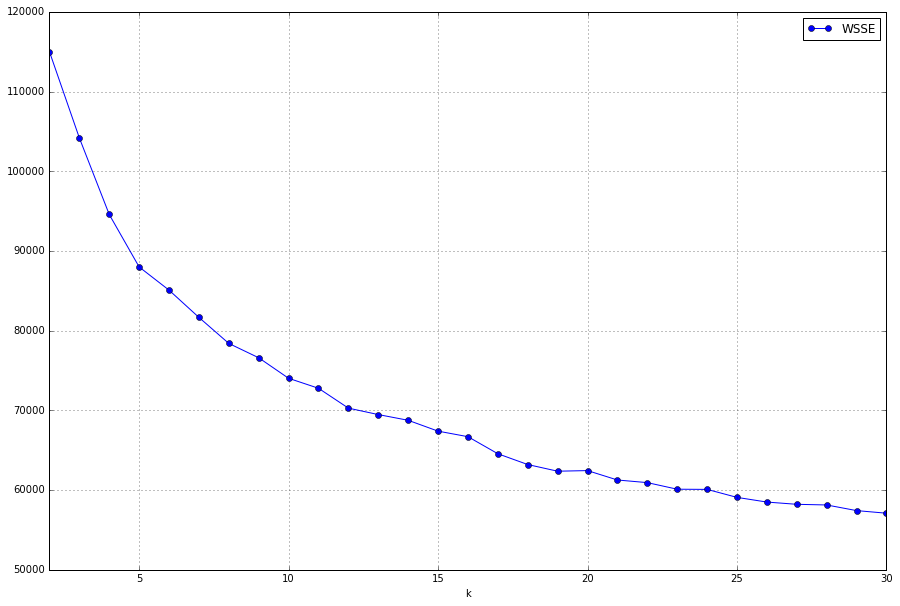

In [28]:
utils.elbow_plot(wsselist, clusters) #check which value of k is best

In [29]:
scaledDataWithFeatures = scaleData.select('features')
scaledDataWithFeatures.persist()

DataFrame[features: vector]

In [30]:
kmeans = KMeans(k=12, seed=1)
model = kmeans.fit(scaledDataWithFeatures)
transformed =model.transform(scaledDataWithFeatures)

In [31]:
model.clusterCenters()

[array([-0.13720796,  0.6061152 ,  0.22970948, -0.62174454,  0.40604553,
        -0.63465994, -0.42215364]),
 array([ 1.42238994, -0.10953198, -1.10891543, -0.07335197, -0.96904335,
        -0.05226062, -0.99615617]),
 array([-0.63637648,  0.01435705, -1.1038928 , -0.58676582, -0.96998758,
        -0.61362174,  0.33603011]),
 array([-0.22385278, -1.06643622,  0.5104215 , -0.24620591,  0.68999967,
        -0.24399706,  1.26206479]),
 array([ 1.17896517, -0.25134204, -1.15089838,  2.11902126, -1.04950228,
         2.23439263, -1.12861666]),
 array([-1.14087425, -0.979473  ,  0.42483303,  1.68904662,  0.52550171,
         1.65795704,  1.03863542]),
 array([ 0.50746307, -1.08840683, -1.20882766, -0.57604727, -1.0367013 ,
        -0.58206904,  0.97099067]),
 array([ 0.14064028,  0.83834618,  1.89291279, -0.62970435, -1.54598923,
        -0.55625032, -0.75082891]),
 array([-0.0339489 ,  0.98719067, -1.33032244, -0.57824562, -1.18095582,
        -0.58893358, -0.81187427]),
 array([-0.22747944

In [33]:
P =utils.pd_centers(Fused, model.clusterCenters())

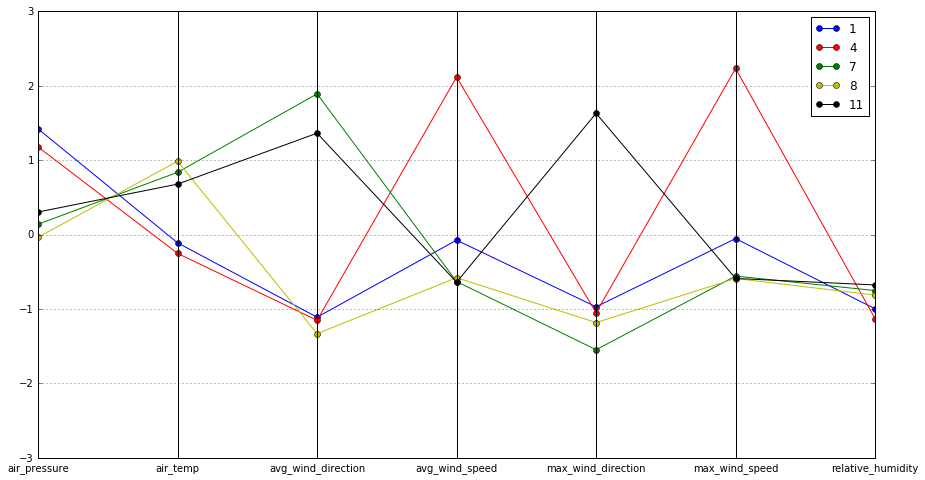

In [34]:
utils.parallel_plot(P[P['relative_humidity'] < -0.5], P)

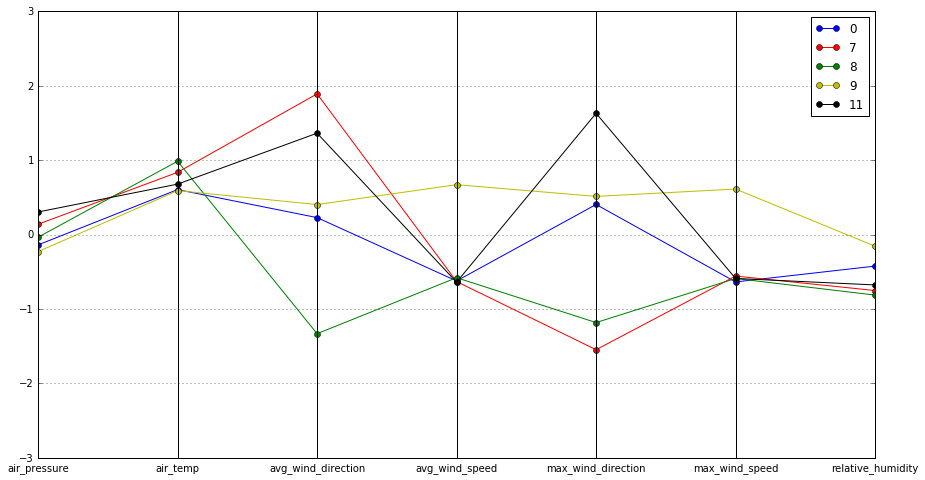

In [35]:
utils.parallel_plot(P[P['air_temp'] > 0.5], P)

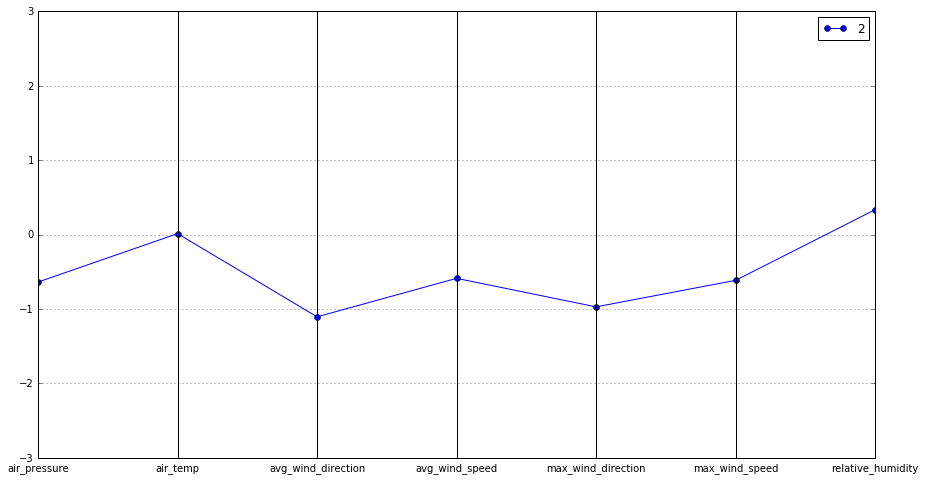

In [36]:
utils.parallel_plot(P.iloc[[2]], P)

In [37]:
fwDF.describe().toPandas()

summary              rowID        air_pressure           air_temp  \
0   count             158680              158680             158680   
1    mean  793627.3355810436   916.8304071086608  61.85578258129617   
2  stddev  458198.0363632447  3.0516872463866034  11.83251581712244   
3     min                  0               905.0              31.64   
4     max            1587250               929.5               99.5   

   avg_wind_direction     avg_wind_speed  max_wind_direction  \
0              158680             158680              158680   
1  162.15610032770354  2.775214897907747  163.46214393748426   
2   95.27820101905898  2.057623969742642   92.45213853838689   
3                 0.0                0.0                 0.0   
4               359.0               31.9               359.0   

       max_wind_speed  min_wind_direction      min_wind_speed  \
0              158680              158680              158680   
1   3.400557726241518  166.77401688933702  2.1346641038568754   
2  2.4188016208098886   97.44110914784567  1.7421125052424393   
3                 0.1                 0.0                 0.0   
4                36.0               359.0                31.6   

   relative_humidity  
0             158680  
1  47.59692021678852  
2  26.20783114367006  
3                0.9  
4               93.0

In [38]:
fwDF.stat.corr('min_wind_speed', 'avg_wind_speed')

0.9708621148272599

In [40]:
kmeans2 = KMeans(k=20, seed=1)
model2 = kmeans2.fit(scaledDataWithFeatures)
transformed2 =model2.transform(scaledDataWithFeatures)

In [41]:
P2 =utils.pd_centers(Fused, model2.clusterCenters())

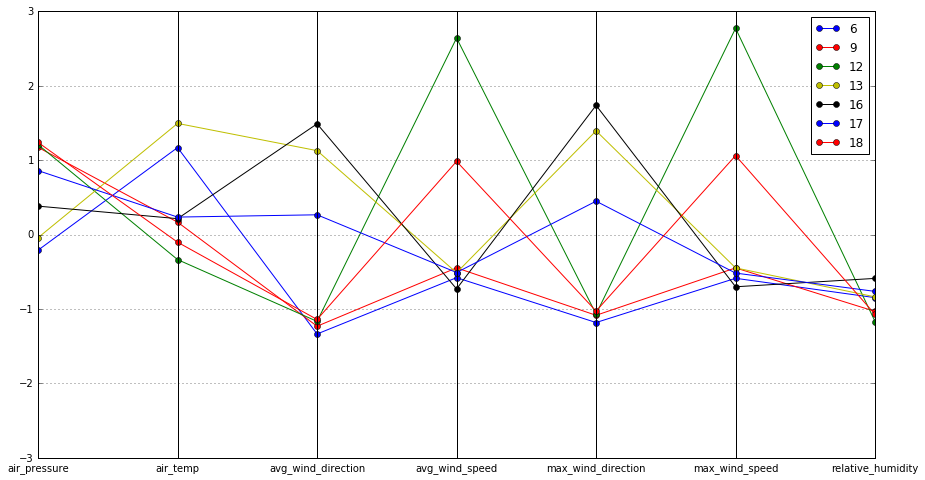

In [44]:
utils.parallel_plot(P2[P2['relative_humidity'] < -0.5], P2)